In [4]:
from importlib import reload  # Python 3.4+ only.
import src
from src.features.utils import decimate_ptr
#reload(src.features.utils)

import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from pathlib import Path
import os
import re
import pandas as pd

from tqdm import tqdm

In [3]:
h5_key = 'decimated'

basedir = Path('..')
datadir = basedir / 'data' / 'raw'
decimate_dir = basedir / 'data' / 'interim' / 'decimated'

In [5]:
## Grab filenames
def get_files(level='(e|n)',
              subject='([0-9]{3})',
              task='(.+?)'):
    files = []
    query = f'^{level}_sub-'
    query += f'{subject}_ses-1_'
    query += f'task-{task}\.csv'
    for f in os.listdir(datadir):
        match = re.search(query, f)
        if match:
            files.append((f, match.groups()))
    
    return(files)

In [86]:
## Load Paths
tasks = ['restingstate', 'openmonitoring', 'compassion']
levels = ['e', 'n']

for task,level in tqdm(np.array(np.meshgrid(tasks,levels)).T.reshape(-1,2)):
    paths = get_files(level=level, task=task)
    
    ## Decimate and store again
    for path,subjs in paths:
        temp = decimate_ptr(pd.read_csv(datadir / path, header = None).to_numpy())
        subj = subjs[0]
        h5f = h5py.File(decimate_dir / f'{level}_sub-{subj}_ses-1_task-{task}_decimate.h5', 'w')
        h5f.create_dataset(h5_key, data=temp)
        h5f.close()
        temp = None

100%|██████████| 6/6 [14:33<00:00, 149.57s/it]


In [54]:
## Test decimate
tasks = ['restingstate', 'openmonitoring', 'compassion']
levels = ['e', 'n']

paths = get_files(task=tasks[0])

raw = []
decimated = []

for path,subj in [paths[0], paths[34]]:
    temp = pd.read_csv(datadir / path, header = None).to_numpy()[:2,:]
    raw.append(temp)
    decimated.append(decimate_ptr(temp))
    temp=None

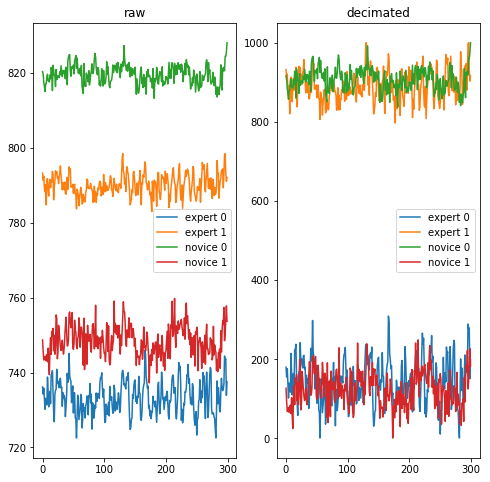

In [55]:
plt.subplots(1,2,figsize=(8,8))

plt.subplot(1,2,1)
for i,ts in enumerate(raw[0]):
    plt.plot(ts, label=f'expert {i}')
    
for i,ts in enumerate(raw[1]):
    plt.plot(ts, label=f'novice {i}')

plt.title('raw')
plt.legend(loc='best')

plt.subplot(1,2,2)
for i,ts in enumerate(decimated[0]):
    plt.plot(ts, label=f'expert {i}')

for i,ts in enumerate(decimated[1]):
    plt.plot(ts, label=f'novice {i}')

plt.title('decimated')
plt.legend(loc='best')
plt.show()

In [53]:
paths[(0,34)]

TypeError: list indices must be integers or slices, not tuple